In [38]:
import os
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import xgboost as xgb
import seaborn as sns
from matplotlib import pyplot as plt

from matplotlib.font_manager import FontProperties
font = FontProperties(fname= "c:\Windows\Fonts\MSJH.TTC")


## File path

In [6]:
# dataset
training_data_file = "C:/Users/88697/Desktop/training_data.csv"
testing_data_file = "C:/Users/88697/Desktop/public_submission_template.csv"

# external data


In [7]:
# Read data
train_df = pd.read_csv(training_data_file, nrows=500000)
test_df = pd.read_csv(testing_data_file)

In [42]:
# String資料統計
def plot_string_counts(column):
    # Use value_counts() to calculate string
    usage_counts = train_df[column].value_counts()

    # histogram
    plt.figure(figsize=(15, 3))
    usage_counts.plot(kind='bar', width=0.5)
    plt.title(column, fontproperties=font)

    # text value
    for i, v in enumerate(usage_counts):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.xticks(fontproperties=font, rotation=0)
    plt.show()

In [9]:
# 縣市-地區 統計
def plot_city(county_column, county_filter, column):
    # Country filter
    filtered_data = train_df[train_df[county_column] == county_filter]

    usage_counts = filtered_data[column].value_counts()

    if usage_counts.empty:
        print(f"No data found for {county_filter} - {column}")
    else:
        # histogram
        plt.figure(figsize=(15, 3))
        usage_counts.plot(kind='bar', width=0.5)
        plt.title(f'{county_filter} - {column}', fontproperties=font)

        # text
        for i, v in enumerate(usage_counts):
            plt.text(i, v, str(v), ha='center', va='bottom')

        plt.xticks(fontproperties=font, rotation=0)
        plt.show()


## Missing data

In [10]:
train_df.isnull().sum()

ID            0
縣市            0
鄉鎮市區          0
路名            0
土地面積          0
使用分區          0
移轉層次          0
總樓層數          0
主要用途          0
主要建材          0
建物型態          0
屋齡            0
建物面積          0
車位面積          0
車位個數          0
橫坐標           0
縱坐標           0
備註        11659
主建物面積         0
陽台面積          0
附屬建物面積        0
單價            0
dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11751 entries, 0 to 11750
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      11751 non-null  object 
 1   縣市      11751 non-null  object 
 2   鄉鎮市區    11751 non-null  object 
 3   路名      11751 non-null  object 
 4   土地面積    11751 non-null  float64
 5   使用分區    11751 non-null  object 
 6   移轉層次    11751 non-null  int64  
 7   總樓層數    11751 non-null  int64  
 8   主要用途    11751 non-null  object 
 9   主要建材    11751 non-null  object 
 10  建物型態    11751 non-null  object 
 11  屋齡      11751 non-null  float64
 12  建物面積    11751 non-null  float64
 13  車位面積    11751 non-null  float64
 14  車位個數    11751 non-null  float64
 15  橫坐標     11751 non-null  int64  
 16  縱坐標     11751 non-null  int64  
 17  備註      92 non-null     object 
 18  主建物面積   11751 non-null  float64
 19  陽台面積    11751 non-null  float64
 20  附屬建物面積  11751 non-null  float64
 21  單價      11751 non-null  float64
dty

In [12]:
train_df.describe()

,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價
count,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,1.175100e+04,11751.000000,11751.000000,11751.000000,11751.000000
mean,0.018416,7.433665,12.602672,21.319058,0.030517,0.021030,0.638669,268260.431878,2.719114e+06,0.026623,0.024876,0.023621,1.993343
std,1.072279,5.089029,6.840007,14.425560,1.083602,1.030720,0.678157,50065.477460,9.271248e+04,1.077374,1.072452,1.177752,1.002079
min,-1.619755,2.000000,2.000000,0.000000,-1.909259,-0.819326,0.000000,-23391.000000,2.493809e+06,-2.070340,-1.642077,-0.438452,0.177415
25%,-0.646264,4.000000,7.000000,8.083333,-0.619995,-0.819326,0.000000,237588.500000,2.708082e+06,-0.612460,-0.623396,-0.438452,1.301691
50%,-0.149839,6.000000,12.000000,21.750000,-0.191390,-0.334257,1.000000,294675.000000,2.766329e+06,-0.148660,-0.077369,-0.438452,1.770145
75%,0.410167,10.000000,15.000000,31.250000,0.339483,0.677589,1.000000,302130.000000,2.772017e+06,0.395765,0.458420,0.146578,2.402558
max,19.475175,46.000000,68.000000,60.083333,13.026437,14.007695,3.000000,334128.000000,2.790801e+06,12.099402,13.842902,33.713188,13.622033


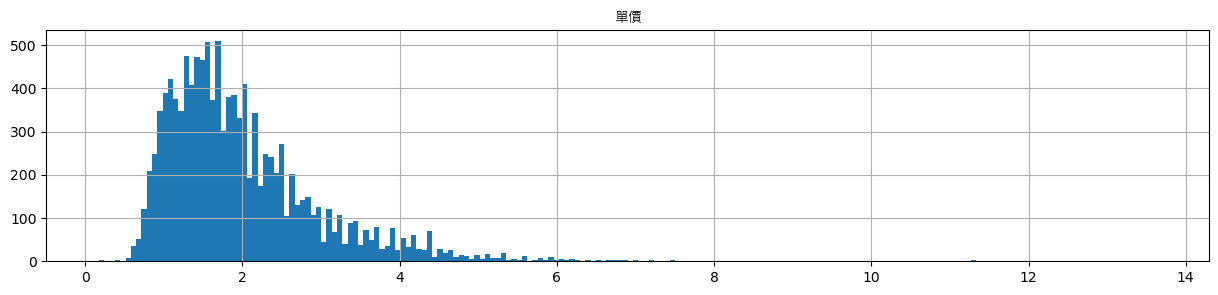

In [43]:
train_df.單價.hist(bins=200, figsize=(15,3))
plt.title('單價',fontproperties=font)
plt.show()

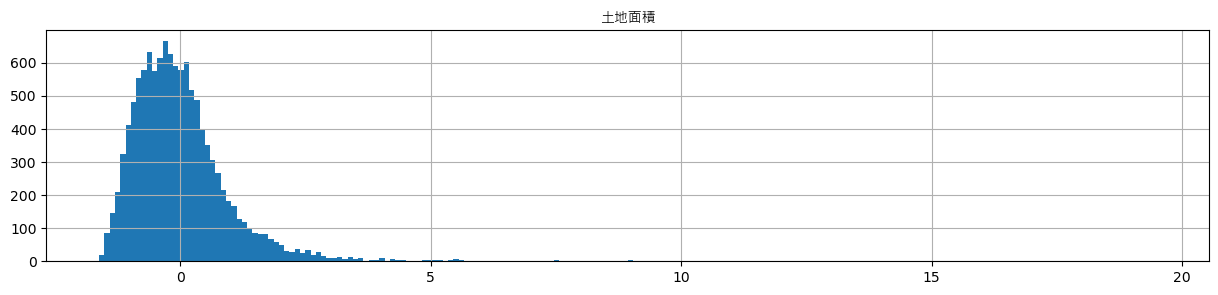

In [44]:
train_df.土地面積.hist(bins=200, figsize=(15,3))
plt.title('土地面積',fontproperties=font)
plt.show()

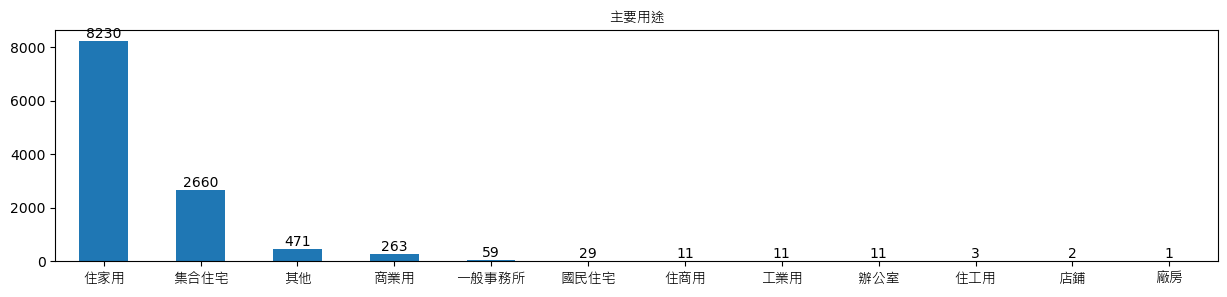

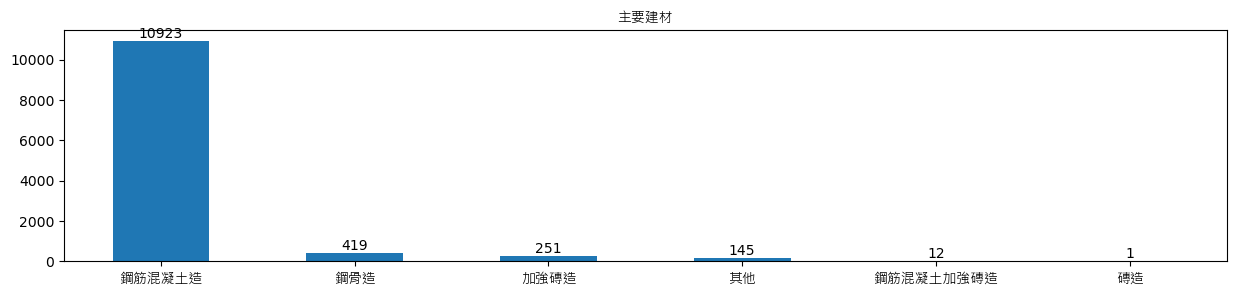

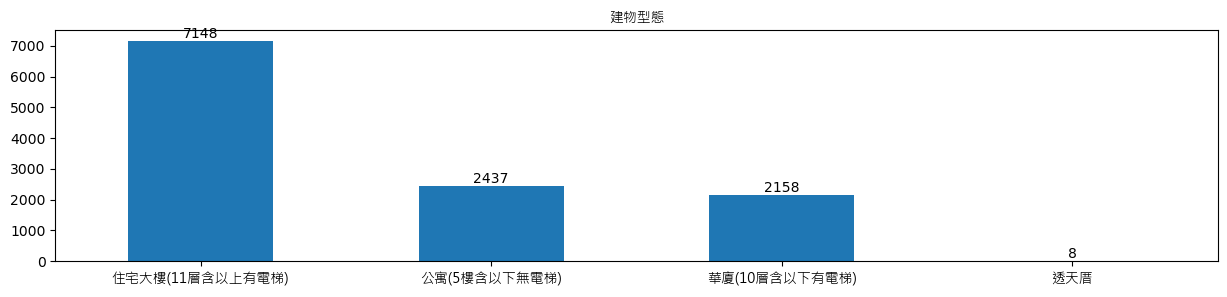

In [45]:
plot_string_counts('主要用途')
plot_string_counts('主要建材')
plot_string_counts('建物型態')

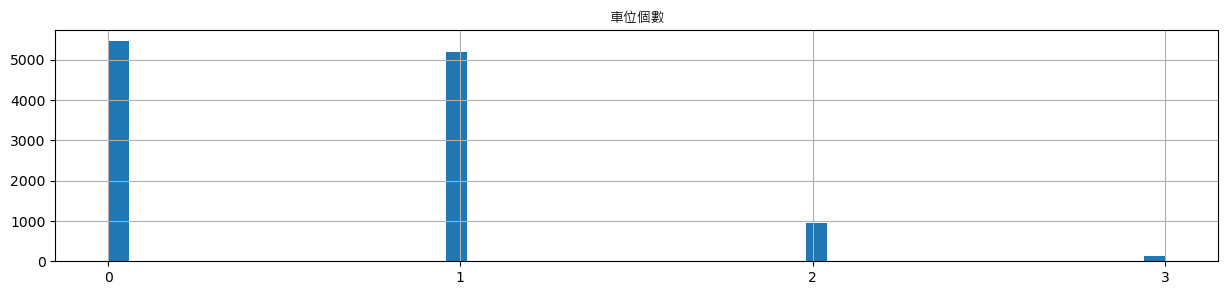

In [46]:
train_df['車位個數'] = train_df['車位個數'].astype(int)

# 绘制直方图
plt.figure(figsize=(15, 3))
train_df['車位個數'].hist(bins=50)
plt.title('車位個數', fontproperties=font)

# 设置x轴刻度
plt.xticks(range(train_df['車位個數'].min(), train_df['車位個數'].max() + 1))

plt.show()

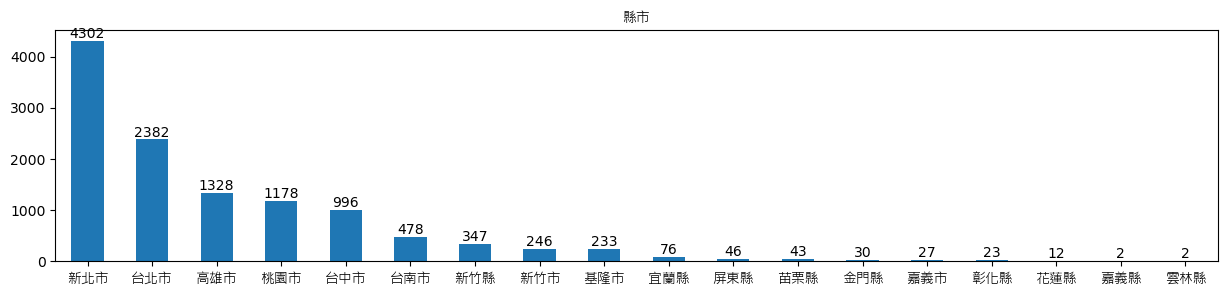

In [47]:
plot_string_counts('縣市')

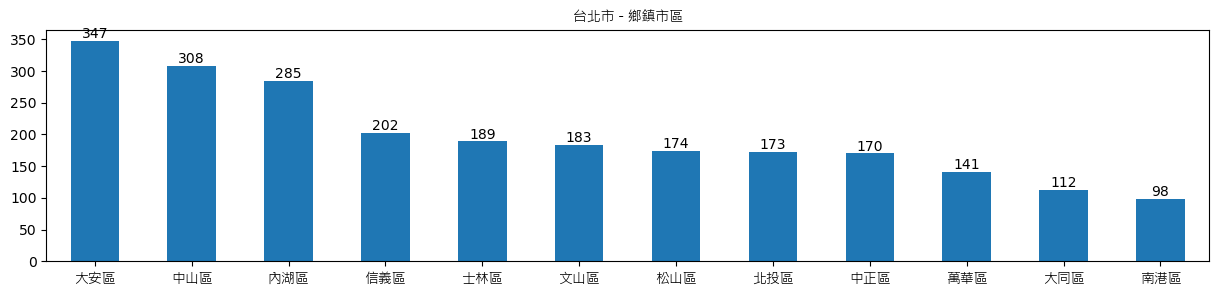

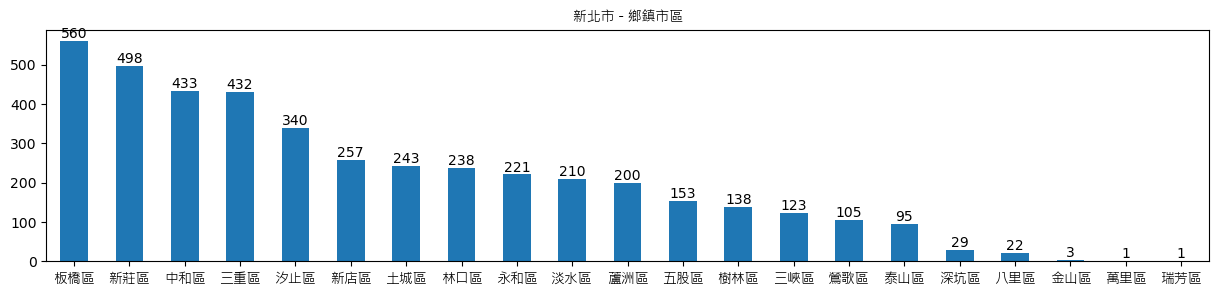

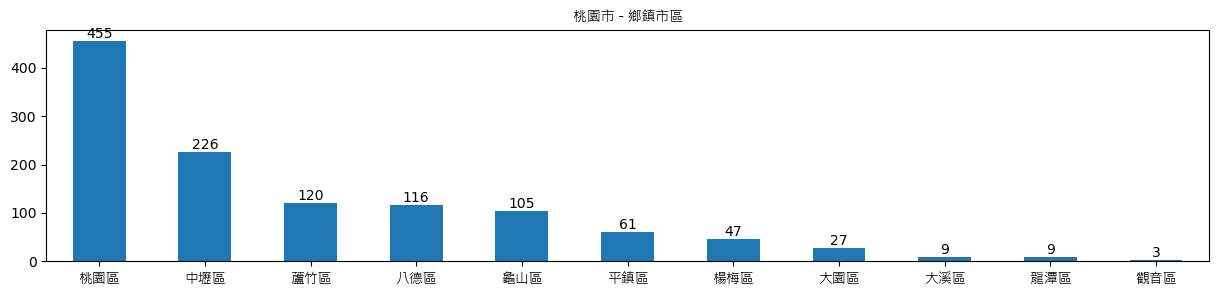

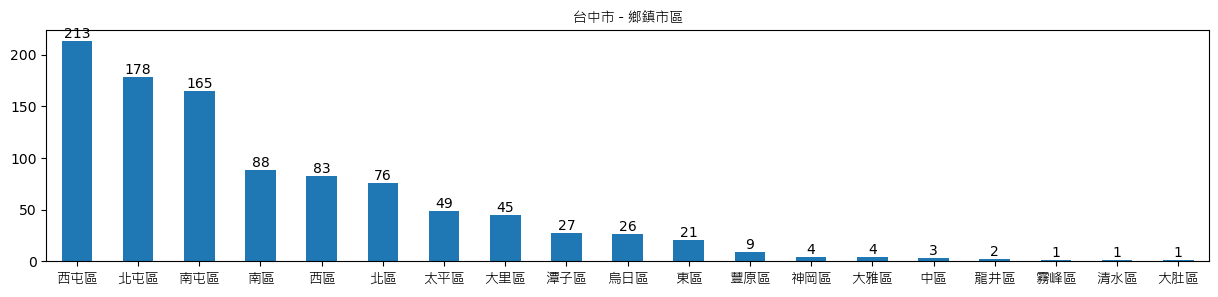

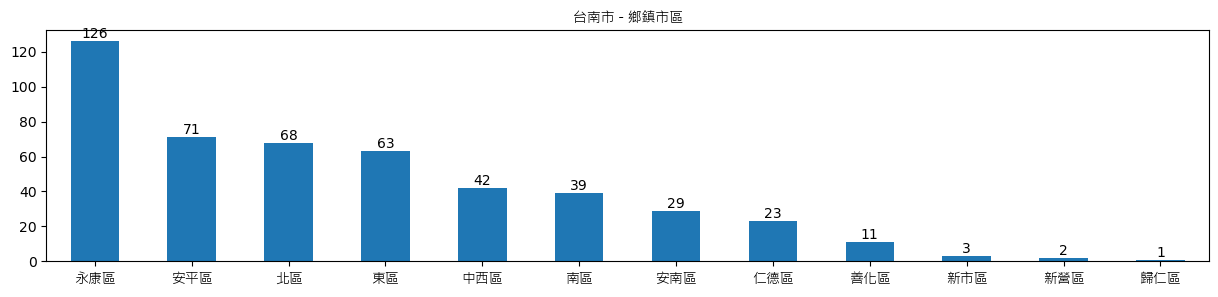

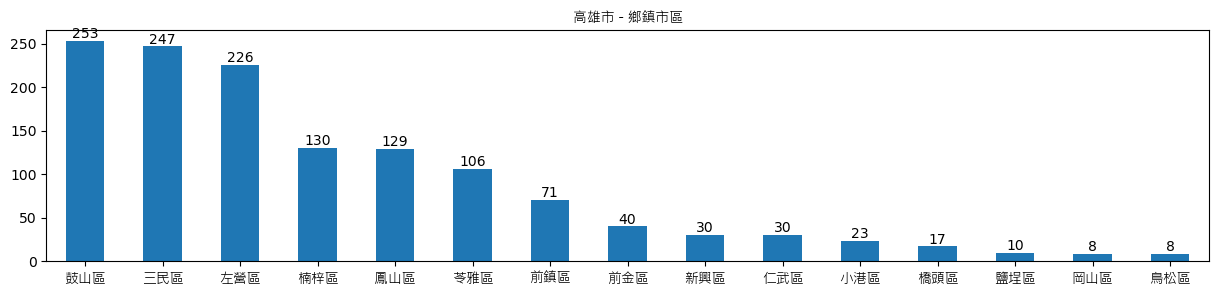

In [48]:
plot_city('縣市', '台北市', '鄉鎮市區')
plot_city('縣市', '新北市', '鄉鎮市區')
plot_city('縣市', '桃園市', '鄉鎮市區')
plot_city('縣市', '台中市', '鄉鎮市區')
plot_city('縣市', '台南市', '鄉鎮市區')
plot_city('縣市', '高雄市', '鄉鎮市區')
